In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

In [4]:
from vis.utils import utils
from vis.utils.vggnet import VGG16
from vis.visualization import visualize_saliency

In [6]:
# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)
print('Model loaded.')

/Users/koichiro.mori/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/vis/utils/vggnet.py:73: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", name="block1_conv1", activation="relu")`
  x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv1')(img_input)
/Users/koichiro.mori/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/vis/utils/vggnet.py:74: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", name="block1_conv2", activation="relu")`
  x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv2')(x)
/Users/koichiro.mori/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/vis/utils/vggnet.py:78: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same", name="block2_conv1", activation="relu")`
  x = Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='block2

Model loaded.


In [11]:
# The name of the Layer we want to visualize
layer_name = 'predictions'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name][0]

In [12]:
layer_idx

22

In [13]:
# Images corresponding to tiger, penguin, dumbbell, speedboat, spider
image_paths = [
    "http://www.tigerfdn.com/wp-content/uploads/2016/05/How-Much-Does-A-Tiger-Weigh.jpg",
    "http://www.slate.com/content/dam/slate/articles/health_and_science/wild_things/2013/10/131025_WILD_AdeliePenguin.jpg.CROP.promo-mediumlarge.jpg",
    "https://www.kshs.org/cool2/graphics/dumbbell1lg.jpg",
    "http://tampaspeedboatadventures.com/wp-content/uploads/2010/10/DSC07011.jpg",
    "http://ichef-1.bbci.co.uk/news/660/cpsprodpb/1C24/production/_85540270_85540265.jpg"
]

In [25]:
heatmaps = []
for path in image_paths:
    seed_img = utils.load_img(path, target_size=(224, 224))
    print(type(seed_img))
    x = np.expand_dims(img_to_array(seed_img), axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    print(decode_predictions(preds, top=1))
    
    pred_class = np.argmax(model.predict(x))
    print(pred_class, layer_idx)
    heatmap = visualize_saliency(model, layer_idx, [pred_class], seed_img)
    heatmaps.append(heatmap)

<class 'numpy.ndarray'>
[[('n02129604', 'tiger', 28.518557)]]
292 22
Working on filters: [292]
<class 'numpy.ndarray'>
[[('n02056570', 'king_penguin', 23.218161)]]
145 22
Working on filters: [145]
<class 'numpy.ndarray'>
[[('n03255030', 'dumbbell', 17.186655)]]
543 22
Working on filters: [543]
<class 'numpy.ndarray'>
[[('n04273569', 'speedboat', 20.409071)]]
814 22
Working on filters: [814]
<class 'numpy.ndarray'>
[[('n04275548', 'spider_web', 24.57597)]]
815 22
Working on filters: [815]


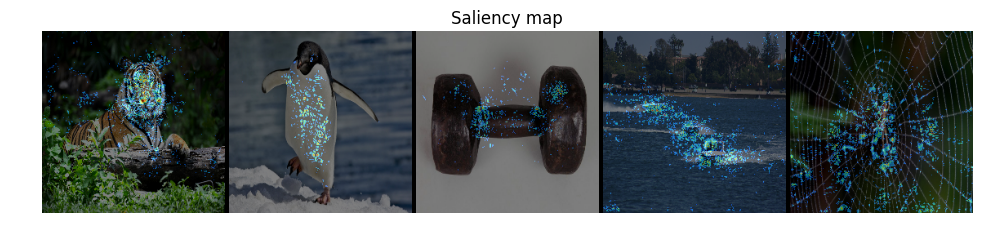

In [22]:
plt.figure(figsize=(12, 8))
plt.axis('off')
plt.imshow(utils.stitch_images(heatmaps))
plt.title('Saliency map')
plt.show()

In [26]:
??utils.load_img